C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   AGGI   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 172.986
Date:                Sat, 12 Nov 2022   AIC                           -339.972
Time:                        15:25:41   BIC                           -334.759
Sample:                             0   HQIC                          -338.062
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9929      0.008    130.734      0.000       0.978       1.008
ma.L1         -0.5971      0.133     -4.504      0.000      -0.857      -0.337
sigma2       1.49e-05   3.69e-06      4.036      0.0

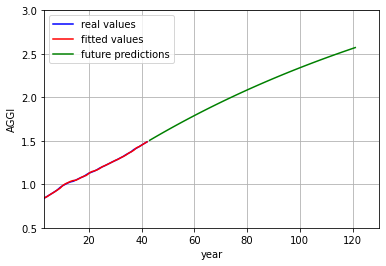

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("AGGI_Table.csv")

model = ARIMA(data["AGGI"],order=(1,1,1)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["AGGI"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(79),color="green",label="future predictions")
plt.xlim([3,130])
plt.ylim([0.5,3])
plt.xlabel("year")
plt.ylabel("AGGI")
plt.legend(loc="best")
print(model.forecast(7))
plt.savefig("aggi.png",dpi=300)

C:\Users\Kingster\AppData\Local\Temp\ipykernel_22268\2946982462.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(dat).show()


ADF test results:  (-2.9396402014966787, 0.040928763813319266, 0, 41, {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}, -313.01058935013464)


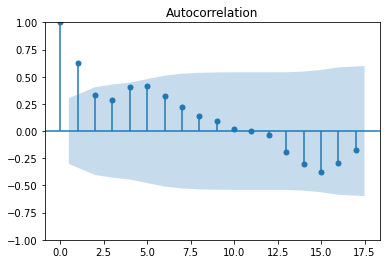

In [68]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf

data = pd.read_csv("AGGI_Table.csv")
dat = np.diff(data["CH4"],1)
plot_acf(dat).show()
print("ADF test results: ",ADF(dat))

In [69]:
# BIC TEST TRAVERSAL

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

data = pd.read_csv("AGGI_Table.csv")

bic_matrix = []
for p in range(5):
    temp = []
    for q in range(5):
        try:
            temp.append(ARIMA(data["CH4"],order=(p,1,q)).fit().bic)
        except:
            temp.append(None)
    bic_matrix.append(temp)

print(bic_matrix)

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966:

[[-352.6248681289366, -381.41411863100404, -378.2852343901037, -394.15880669589797, -392.69882748289075], [-415.0724975161395, -411.0797132307062, -406.66542507837084, -403.4824579165198, -409.93625406028406], [-410.9143452391387, -408.0147817472859, -408.4290412444657, -400.4230672122993, -406.17809151282205], [-412.05148470865834, -404.68134435828836, -408.5261299507294, -403.8926252051304, -402.39742797977374], [-412.6527911428978, -407.37348750641377, -404.6275583425712, -400.932794891081, -399.57039136198034]]


C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    CH4   No. Observations:                   43
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 211.274
Date:                Sat, 12 Nov 2022   AIC                           -418.548
Time:                        17:29:11   BIC                           -415.072
Sample:                             0   HQIC                          -417.274
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8835      0.055     16.136      0.000       0.776       0.991
sigma2      2.415e-06   5.63e-07      4.290      0.000    1.31e-06    3.52e-06
Ljung-Box (L1) (Q):                   0.16   Jarque-

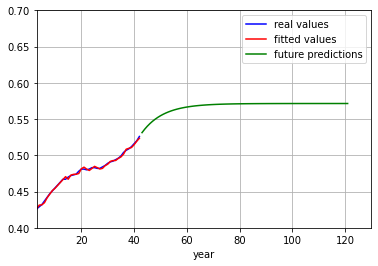

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("AGGI_Table.csv")

model = ARIMA(data["CH4"],order=(1,1,0)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["CH4"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(79),color="green",label="future predictions")
plt.xlim([3,130])
plt.ylim([0.4,0.7])
plt.xlabel("year")
plt.ylabel("")
plt.legend(loc="best")
print(model.forecast(7))
#np.savetxt("CH4.csv",model.forecast(79),delimiter=",")

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    N2O   No. Observations:                   43
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 217.969
Date:                Sat, 12 Nov 2022   AIC                           -431.938
Time:                        16:47:19   BIC                           -428.511
Sample:                             0   HQIC                          -430.690
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7264      0.194     -3.748      0.000      -1.106      -0.347
sigma2      1.375e-06   2.86e-07      4.807      0.000    8.14e-07    1.94e-06
Ljung-Box (L1) (Q):                   0.09   Jarque-

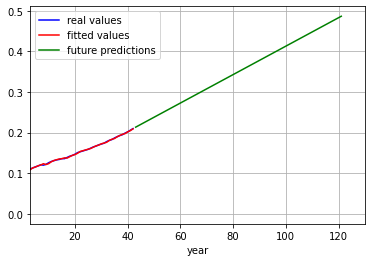

In [42]:
# N2O
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("AGGI_Table.csv")

model = ARIMA(data["N2O"],order=(0,2,1)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["N2O"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(79),color="green",label="future predictions")
plt.xlim([3,130])
#plt.ylim([0.4,0.7])
plt.xlabel("year")
plt.ylabel("")
plt.legend(loc="best")
print(model.forecast(7))
np.savetxt("N2O_prediction.csv",model.forecast(79),delimiter=",")

                               SARIMAX Results                                
Dep. Variable:                   CFC*   No. Observations:                   43
Model:                 ARIMA(0, 3, 2)   Log Likelihood                 206.535
Date:                Sat, 12 Nov 2022   AIC                           -407.070
Time:                        16:53:39   BIC                           -402.004
Sample:                             0   HQIC                          -405.238
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9432      0.116     -8.108      0.000      -1.171      -0.715
ma.L2          0.4248      0.174      2.442      0.015       0.084       0.766
sigma2      1.866e-06   3.08e-07      6.058      0.0

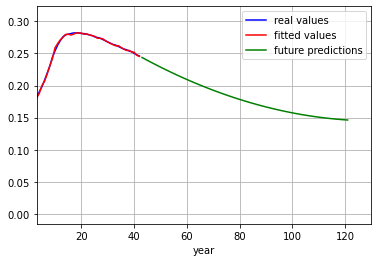

In [52]:
# CFC*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("AGGI_Table.csv")

model = ARIMA(data["CFC*"],order=(0,3,2)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["CFC*"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(79),color="green",label="future predictions")
plt.xlim([3,130])
#plt.ylim([0.4,0.7])
plt.xlabel("year")
plt.ylabel("")
plt.legend(loc="best")
print(model.forecast(7))
np.savetxt("CFC_prediction.csv",model.forecast(79),delimiter=",")

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  HCFCs   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 256.606
Date:                Sat, 12 Nov 2022   AIC                           -507.211
Time:                        16:58:05   BIC                           -501.998
Sample:                             0   HQIC                          -505.300
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9957      0.011     86.782      0.000       0.973       1.018
ma.L1         -0.7063      0.137     -5.145      0.000      -0.975      -0.437
sigma2      2.708e-07   8.29e-08      3.268      0.0

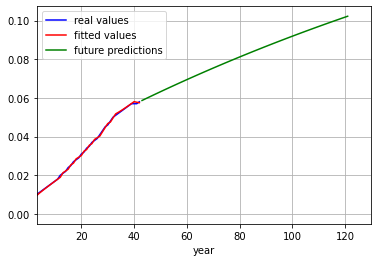

In [58]:
# HCFCS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("AGGI_Table.csv")

model = ARIMA(data["HCFCs"],order=(1,1,1)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["HCFCs"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(79),color="green",label="future predictions")
plt.xlim([3,130])
#plt.ylim([0.4,0.7])
plt.xlabel("year")
plt.ylabel("")
plt.legend(loc="best")
print(model.forecast(7))
np.savetxt("HCFCs_prediction.csv",model.forecast(79),delimiter=",")

                               SARIMAX Results                                
Dep. Variable:                  HFCs*   No. Observations:                   43
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 244.369
Date:                Sat, 12 Nov 2022   AIC                           -482.738
Time:                        17:17:45   BIC                           -477.597
Sample:                             0   HQIC                          -480.866
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1822      0.275     -0.663      0.507      -0.721       0.357
ma.L1         -0.8529      0.062    -13.825      0.000      -0.974      -0.732
sigma2       3.73e-07   1.15e-07      3.249      0.0

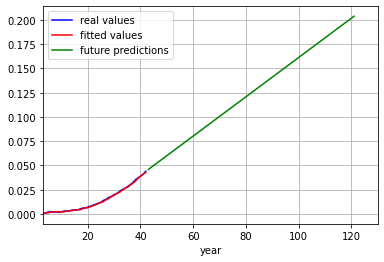

In [66]:
# HFCs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("AGGI_Table.csv")

model = ARIMA(data["HFCs*"],order=(1,2,1)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["HFCs*"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(79),color="green",label="future predictions")
plt.xlim([3,130])
#plt.ylim([0.4,0.7])
plt.xlabel("year")
plt.ylabel("")
plt.legend(loc="best")
print(model.forecast(7))
np.savetxt("HFCs_prediction.csv",model.forecast(79),delimiter=",")